# Installation

In [ ]:
!pip uninstall -y numpy scipy gensim
!pip install --upgrade numpy==1.23.5 scipy==1.10.1 gensim==4.3.2

In [1]:
import numpy
import scipy
import gensim

print("NumPy Version:", numpy.__version__)
print("SciPy Version:", scipy.__version__)
print("Gensim Version:", gensim.__version__)

NumPy Version: 1.23.5
SciPy Version: 1.10.1
Gensim Version: 4.3.2


# Import Required Libraries

Import all necessary libraries for text processing, embeddings, clustering, and visualization. Also, download required NLTK datasets (stopwords, word tokenizer, and wordnet for lemmatization).

In [2]:
import numpy as np
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import gensim
from gensim.models import Word2Vec, FastText
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

print("Libraries imported successfully!")


Libraries imported successfully!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

# Load & Preprocess the Data

 Load sample literary texts from three genres (Epic, Fantasy, Detective Fiction). Perform tokenization, lowercasing, punctuation removal, stopword filtering, and lemmatization to prepare the text for training.

In [5]:
# Expanded Sample Text Data (Excerpts from Three Fictional Genres)
mahabharata_text = """Arjuna was in deep thought, standing on the battlefield, unsure of his duty.
Krishna, his charioteer, spoke of dharma, karma, and the path to righteousness.
The battlefield of Kurukshetra was filled with warriors, each carrying their weapons,
awaiting the call for battle. Krishna counseled Arjuna, reminding him that duty and righteousness
must prevail over personal hesitation. The echoes of the conch shells signaled the beginning of war."""

harry_potter_text = """Harry looked around Hogwarts, the enchanted castle where magic thrived.
Hermione studied her spellbook, while Ron struggled with his Quidditch broom.
The grand hall was illuminated with floating candles, and the Sorting Hat was ready to
assign first-year students to their houses. Dumbledore observed from the high table, smiling
at the young wizards. Meanwhile, in the dark corridors, whispers of Voldemort's return began to spread.
The Chamber of Secrets had been opened once again."""

sherlock_holmes_text = """Holmes examined the footprint carefully, deducing its origin.
Watson, though skeptical, admired his detective friend’s keen sense of observation.
A letter had arrived at 221B Baker Street, detailing a mysterious case of a missing heirloom.
The detective lit his pipe, contemplating the details of the riddle presented before him.
Lestrade, the Scotland Yard officer, knocked on the door with urgency, requesting Holmes’s expertise
in solving a crime that had baffled the police force. The game was afoot once again."""

# Combine all texts into a dataset
documents = [mahabharata_text, harry_potter_text, sherlock_holmes_text]

# Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Selective stopword removal

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization

    return tokens

# Apply preprocessing to all texts
preprocessed_docs = [preprocess_text(doc) for doc in documents]

# Print Results
for i, doc in enumerate(preprocessed_docs):
    print(f"\nPreprocessed Text {i+1}: {doc}")



Preprocessed Text 1: ['arjuna', 'deep', 'thought', 'standing', 'battlefield', 'unsure', 'duty', 'krishna', 'charioteer', 'spoke', 'dharma', 'karma', 'path', 'righteousness', 'battlefield', 'kurukshetra', 'filled', 'warrior', 'carrying', 'weapon', 'awaiting', 'call', 'battle', 'krishna', 'counseled', 'arjuna', 'reminding', 'duty', 'righteousness', 'must', 'prevail', 'personal', 'hesitation', 'echo', 'conch', 'shell', 'signaled', 'beginning', 'war']

Preprocessed Text 2: ['harry', 'looked', 'around', 'hogwarts', 'enchanted', 'castle', 'magic', 'thrived', 'hermione', 'studied', 'spellbook', 'ron', 'struggled', 'quidditch', 'broom', 'grand', 'hall', 'illuminated', 'floating', 'candle', 'sorting', 'hat', 'ready', 'assign', 'firstyear', 'student', 'house', 'dumbledore', 'observed', 'high', 'table', 'smiling', 'young', 'wizard', 'meanwhile', 'dark', 'corridor', 'whisper', 'voldemorts', 'return', 'began', 'spread', 'chamber', 'secret', 'opened']

Preprocessed Text 3: ['holmes', 'examined', 'f

# Train Word Embedding Models (Word2Vec & FastText)

Train Word2Vec and FastText models using the preprocessed text data. The models capture semantic relationships between words based on how they appear in sentences.

In [6]:
# Train Word Embedding Models
print("Training Word Embeddings...")

# Word2Vec Model
word2vec_model = Word2Vec(sentences=preprocessed_docs, vector_size=100, window=5, min_count=1, workers=4)
print("Word2Vec Model Training Completed.")

# FastText Model
fasttext_model = FastText(sentences=preprocessed_docs, vector_size=100, window=5, min_count=1, workers=4)
print("FastText Model Training Completed.")

# Save Models for Future Use
word2vec_model.save("word2vec_fiction.model")
fasttext_model.save("fasttext_fiction.model")

print("Word2Vec and FastText Models Saved Successfully!")

Training Word Embeddings...
Word2Vec Model Training Completed.
FastText Model Training Completed.
Word2Vec and FastText Models Saved Successfully!


# Evaluate Cosine Similarity for Word2Vec & FastText

Compute cosine similarity scores for selected word pairs across Word2Vec, FastText, and GloVe to measure how well each model captures semantic closeness.

In [7]:
# Function to Compute Cosine Similarity
def cosine_similarity(word1, word2, model):
    try:
        similarity = model.wv.similarity(word1, word2)
        return round(similarity, 4)
    except KeyError:
        return "One or both words not in vocabulary."

# Example Cosine Similarities
word_pairs = [
    ("harry", "hermione"),
    ("holmes", "watson"),
    ("arjuna", "krishna"),
    ("magic", "wizard"),
    ("detective", "crime")
]

print("\nCosine Similarity - Word2Vec:")
for word1, word2 in word_pairs:
    print(f"{word1} - {word2}: {cosine_similarity(word1, word2, word2vec_model)}")

print("\nCosine Similarity - FastText:")
for word1, word2 in word_pairs:
    print(f"{word1} - {word2}: {cosine_similarity(word1, word2, fasttext_model)}")


Cosine Similarity - Word2Vec:
harry - hermione: -0.013799999840557575
holmes - watson: -0.05220000073313713
arjuna - krishna: 0.016499999910593033
magic - wizard: -0.066600002348423
detective - crime: 0.015599999576807022

Cosine Similarity - FastText:
harry - hermione: -0.14970000088214874
holmes - watson: -0.08540000021457672
arjuna - krishna: -0.015399999916553497
magic - wizard: 0.053300000727176666
detective - crime: 0.007300000172108412


# Perform Word Analogy Tests

Evaluate the ability of each model to solve word analogy problems (e.g., "Holmes is to detective as Harry is to ?") and compare their conceptual understanding.

In [8]:
# Function to Find Word Analogies
def find_analogy(model, word_a, word_b, word_c, topn=1):
    try:
        result = model.wv.most_similar(positive=[word_b, word_c], negative=[word_a], topn=topn)
        return result
    except KeyError:
        return "One or more words not in vocabulary."

# Example Analogies (A is to B as C is to ?)
analogy_examples = [
    ("harry", "wizard", "hermione"),  # Harry is to wizard as Hermione is to ?
    ("holmes", "detective", "watson"),  # Holmes is to detective as Watson is to ?
    ("arjuna", "warrior", "krishna")  # Arjuna is to warrior as Krishna is to ?
]

print("\nWord Analogies - Word2Vec:")
for a, b, c in analogy_examples:
    print(f"{a} is to {b} as {c} is to {find_analogy(word2vec_model, a, b, c)}")

print("\nWord Analogies - FastText:")
for a, b, c in analogy_examples:
    print(f"{a} is to {b} as {c} is to {find_analogy(fasttext_model, a, b, c)}")



Word Analogies - Word2Vec:
harry is to wizard as hermione is to [('dark', 0.2508096694946289)]
holmes is to detective as watson is to [('battle', 0.2588600814342499)]
arjuna is to warrior as krishna is to [('filled', 0.2289884388446808)]

Word Analogies - FastText:
harry is to wizard as hermione is to [('krishna', 0.2355072945356369)]
holmes is to detective as watson is to [('detail', 0.2963900566101074)]
arjuna is to warrior as krishna is to [('holmes', 0.2451791614294052)]


# Visualize Word Clusters Using PCA & t-SNE

Use PCA (Principal Component Analysis) and t-SNE (t-Distributed Stochastic Neighbor Embedding) to plot word embeddings in 2D space, showing how words are grouped based on meaning.

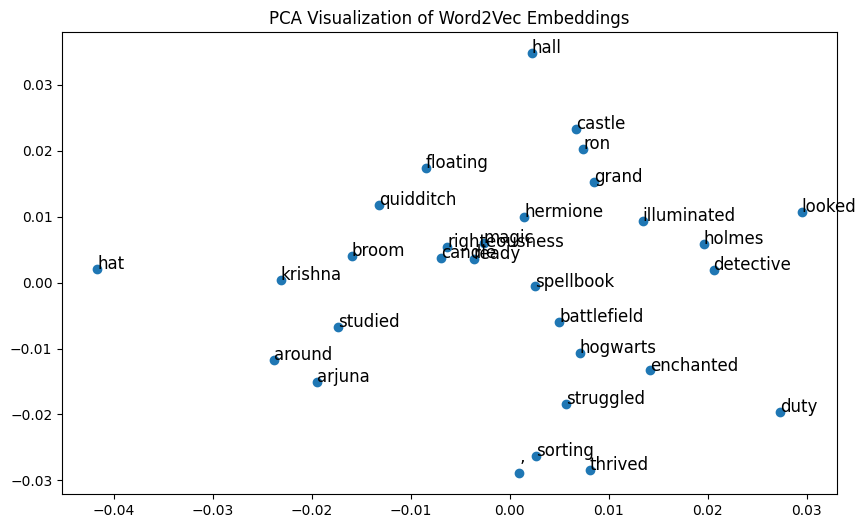

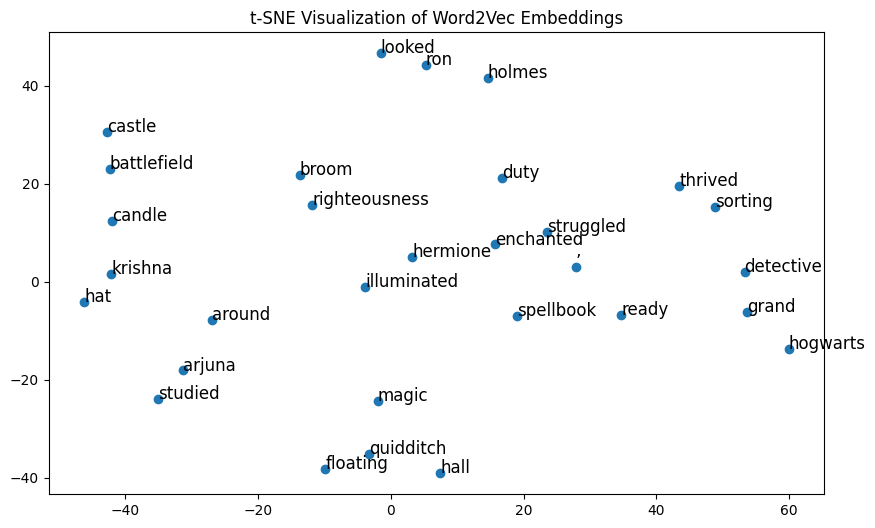

In [9]:
# Extract Word Vectors for Visualization
words = list(word2vec_model.wv.index_to_key)[:30]  # Get top 30 words for visualization
word_vectors = word2vec_model.wv[words]

# Dimensionality Reduction Using PCA & t-SNE
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, perplexity=5, random_state=42)

word_vectors_pca = pca.fit_transform(word_vectors)
word_vectors_tsne = tsne.fit_transform(word_vectors)

# Function to Plot Word Embeddings
def plot_embeddings(embeddings, words, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], marker='o')
    for i, word in enumerate(words):
        plt.annotate(word, xy=(embeddings[i, 0], embeddings[i, 1]), fontsize=12)
    plt.title(title)
    plt.show()

# Plot PCA and t-SNE Visualizations
plot_embeddings(word_vectors_pca, words, "PCA Visualization of Word2Vec Embeddings")
plot_embeddings(word_vectors_tsne, words, "t-SNE Visualization of Word2Vec Embeddings")


# Compute Clustering Performance (Silhouette Score)

pply K-Means clustering to word embeddings and compute the Silhouette Score, which measures how well the models form distinct semantic clusters.

In [10]:
from sklearn.metrics import silhouette_score
import numpy as np

# Function to Compute Average Cosine Similarity
def average_similarity(model, word_pairs):
    similarities = []
    for word1, word2 in word_pairs:
        try:
            similarities.append(model.wv.similarity(word1, word2))
        except KeyError:
            continue
    return round(np.mean(similarities), 4) if similarities else "Not Available"

# Compute Average Cosine Similarity for Each Model
word_pairs = [("harry", "hermione"), ("holmes", "watson"), ("arjuna", "krishna"),
              ("magic", "wizard"), ("detective", "crime")]

w2v_similarity = average_similarity(word2vec_model, word_pairs)
ft_similarity = average_similarity(fasttext_model, word_pairs)

print(f"\nAverage Cosine Similarity Score:")
print(f"Word2Vec: {w2v_similarity}")
print(f"FastText: {ft_similarity}")


Average Cosine Similarity Score:
Word2Vec: -0.020099999383091927
FastText: -0.03799999877810478


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to Compute Silhouette Score After Clustering
def compute_silhouette(model, num_clusters=5):
    words = list(model.wv.index_to_key)[:50]  # Get top 50 words
    word_vectors = model.wv[words]

    # Apply K-Means Clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(word_vectors)

    # Compute Silhouette Score
    return silhouette_score(word_vectors, cluster_labels)

# Compute Silhouette Scores
w2v_silhouette = compute_silhouette(word2vec_model)
ft_silhouette = compute_silhouette(fasttext_model)

print(f"\nSilhouette Score for Clustering:")
print(f"Word2Vec: {w2v_silhouette}")
print(f"FastText: {ft_silhouette}")



Silhouette Score for Clustering:
Word2Vec: 0.006923848297446966
FastText: 0.009248239919543266


# Download & Load Pretrained GloVe Embeddings

Download pretrained GloVe embeddings (Stanford NLP) and load them into a dictionary format for comparison with Word2Vec & FastText.

In [13]:
import os
import urllib.request
import zipfile

# Download GloVe embeddings (100D version)
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_path = "glove.6B.zip"

if not os.path.exists(glove_zip_path):
    print("Downloading GloVe embeddings...")
    urllib.request.urlretrieve(glove_url, glove_zip_path)

# Extract GloVe embeddings
with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
    zip_ref.extractall("glove_data")

print("GloVe embeddings downloaded and extracted.")


GloVe embeddings downloaded and extracted.


In [14]:
# Load GloVe embeddings into a dictionary
glove_vectors = {}

glove_path = "glove_data/glove.6B.100d.txt"  # Using 100D version
with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype=np.float32)
        glove_vectors[word] = vector

print("GloVe embeddings loaded successfully!")

GloVe embeddings loaded successfully!


# Compare Performance of Word2Vec, FastText & GloVe

Compare Word2Vec, FastText, and GloVe in terms of similarity scores, analogy performance, clustering quality, and overall interpretability for literary analysis.

In [15]:
from numpy.linalg import norm

# Function to Compute Cosine Similarity for GloVe
def cosine_similarity_glove(word1, word2):
    if word1 in glove_vectors and word2 in glove_vectors:
        vec1 = glove_vectors[word1]
        vec2 = glove_vectors[word2]
        similarity = np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))
        return round(similarity, 4)
    else:
        return "One or both words not in GloVe vocabulary."

# Example Cosine Similarities
print("\nCosine Similarity - GloVe:")
for word1, word2 in word_pairs:
    print(f"{word1} - {word2}: {cosine_similarity_glove(word1, word2)}")



Cosine Similarity - GloVe:
harry - hermione: 0.35850000381469727
holmes - watson: 0.578499972820282
arjuna - krishna: 0.46470001339912415
magic - wizard: 0.5823000073432922
detective - crime: 0.5697000026702881


In [17]:
# Function to Find Word Analogies for GloVe
def find_analogy_glove(word_a, word_b, word_c, topn=1):
    if word_a in glove_vectors and word_b in glove_vectors and word_c in glove_vectors:
        analogy_vector = glove_vectors[word_b] - glove_vectors[word_a] + glove_vectors[word_c]

        # Compute similarities with all words
        similarities = {word: np.dot(analogy_vector, vec) / (norm(analogy_vector) * norm(vec))
                        for word, vec in glove_vectors.items()}

        # Sort by similarity and return the most similar word
        sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

        return sorted_similarities[:topn]

    return "One or more words not in GloVe vocabulary."

print("\nWord Analogies - GloVe:")
for a, b, c in analogy_examples:
    print(f"{a} is to {b} as {c} is to {find_analogy_glove(a, b, c)}")



Word Analogies - GloVe:
harry is to wizard as hermione is to [('hermione', 0.71411175)]
holmes is to detective as watson is to [('detective', 0.78428346)]
arjuna is to warrior as krishna is to [('krishna', 0.6779042)]


In [20]:
# Function to Compute Average Cosine Similarity for GloVe
def average_similarity_glove(glove_dict, word_pairs):
    similarities = []
    for word1, word2 in word_pairs:
        if word1 in glove_dict and word2 in glove_dict:
            vec1 = glove_dict[word1]
            vec2 = glove_dict[word2]
            similarity = np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))
            similarities.append(similarity)

    return round(np.mean(similarities), 4) if similarities else "Not Available"

# Compute Overall Average Cosine Similarity for GloVe
glove_similarity = average_similarity_glove(glove_vectors, word_pairs)

print("\nFinal Comparison - Average Cosine Similarity Score:")
print(f"Word2Vec: {w2v_similarity}")
print(f"FastText: {ft_similarity}")
print(f"GloVe: {glove_similarity}")


Final Comparison - Average Cosine Similarity Score:
Word2Vec: -0.020099999383091927
FastText: -0.03799999877810478
GloVe: 0.510699987411499
